<center>
    <font size="5"> Zaawansowane Metody Sztucznej Inteligencji<br/>
        <small><em>Studia stacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka</small>
    </font>
</center>
<br>


# Laboratorium nr 1.1: Sieci neuronowe - przypomnienie

### Montowanie Google Drive

In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 6.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


## Perceptron
![perceptron](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/neuron2.PNG)![eq](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/n2eq2.PNG)

### Uczenie perceptronu
Uczenie perceptronu należy do grupy uczenia z nauczycielem i polega na takim doborze wektora wag $w$, aby sygnał wyjściowy neuronu $y$ były najbliżej wartości pożądanej $d$. Najpopularniejszą metodą uczenia perceptronu jest tzw. _reguła perceptronu_, którą można opisać w postaci kilku kroków.

Załóżmy, że dysponujemy zbiorem wektorów uczących postaci $\{x^{(0)}, x^{(1)}, \ldots, x^{(P)}\}$ oraz odpowiadającym mu zbiorem wartości pożądanych $\{d^{(0)}, d^{(1)},\ldots, d^{(P)}\}$.

#### Reguła perceptronu
1. Ustalamy $t = 0$.
2. Ustalamy w sposób losowy początkowe wartości wektora wag $w$.
3. Prezentujemy na wejścia perceptronu wektor uczący $x^{(t)}$.
4. Obliczamy odpowiedź perceptronu $y$ zgodnie z wzorem $y = g\left(\sum\limits_{i=0}^N{w_ix^{(t)}_i}\right)$, gdzie $g$ to fukcja skoku zwracająca $1$ gdy argument jest większy od $0$, a w przeciwnym wypadku $0$.
5. Porównujemy odpowiedź perceptronu $y$ z pożądaną odpowiedzią $d^{(t)}$.
6. Modyfikujemy wartości wag według poniższych reguł, parametr $\eta\in(0,1)$ to _współczynnuk uczenia_:
   - jeśli $y = d^{(t)}$ to wagi pozostają niezmienione,
   - jeśli $y = 0$, a $d^{(t)}=1$ to $w_i = w_i + \eta x_i^{(t)}$,
   - jeśli $y = 1$, a $d^{(t)}=0$ to $w_i = w_i - \eta x_i^{(t)}$.
7. Jeżeli warunek zatrzymania nie jest spełniony, to ustalamy $t = t + 1$ i wracamy do kroku 3, w przeciwnym przypadku kończymy algorytm.

Wykonanie powyższej procedury dla wszystkich wektorów uczących nazywamy _epoką uczenia_. W przypadku uczenia perceptronu wykonujemy tyle epok, aż wszystkie przykłady uczące będą dobrze sklasyfikowane lub błąd klasyfikacji będzie dostatecznie mały. Stabilność oraz szybkość uczenia tym algorytmem w istotny sposób zależy od doboru
parametru $\eta$. Współczynnik ten dobierany jest najczęściej w sposób empiryczny.

## Ćwiczenie 1:
Zaimplementuj model preceptronu w postaci klasy.

In [2]:
import numpy as np

class Perceptron:
     # Inicjalizator, ustawiający atrybut self.w oraz self.b jako wektor losowych wag, n ilość sygnałów wejściowych (bias)
    def __init__(self, n, bias=True):
        self.w = np.random.rand(n)
        self.b = 1.0 if bias else 0.0

    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[x1,x2,...,xN]
    def predict(self, x):
        activation = np.dot(self.w, x) + self.b
        return 1 if activation >= 0 else 0

    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol):
        t = 0
        while True:
            errors = 0
            for x, desired in zip(xx, d):
                prediction = self.predict(x)


                if prediction != desired:
                    error = desired - prediction

                    if prediction == 0 and desired == 1:
                        self.w += eta * np.array(x)
                        self.b += eta
                    elif prediction == 1 and desired == 0:
                        self.w -= eta * np.array(x)
                        self.b -= eta

                    errors += 1
            if errors <= tol:
                break
            t += 1
        print(f"Algorytm zatrzymał się po {t} epokach")

    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        errors = 0
        predictions = []
        for x, desired in zip(xx, d):
            prediction = self.predict(x)
            predictions.append(prediction)
            errors += abs(desired - prediction)
        return errors, predictions



In [3]:
xx = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
d = np.array([0, 1, 1, 1])

perceptron = Perceptron(n=2)
eta = 0.1
tol = 0
perceptron.train(xx, d, eta, tol)

errors, predictions = perceptron.evaluate_test(xx, d)
print(errors)
print(predictions)

Algorytm zatrzymał się po 11 epokach
0
[0, 1, 1, 1]


## Ćwiczenie 2:
- Stwórz dwa obiekty klasy `Perceptron`.
- Wczytaj dane z plików `2D.csv` oraz `3D.csv.`
- Pierwszy z perceptronów naucz klasyfikować dane z pliku `2D.csv`, ucz tylko na losowej części danych (np. 80%)
- Drugi z perceptronów naucz klasyfikować dane z pliku `3D.csv`, ucz tylko na losowej części danych (np. 80%)
- Oba zbiory danych są przykładami problemów liniowo separowalnych, a więc należy uczyć modele tak aby uzyskiwać dla danych uczących błąd równy zero.
- Przedstaw rezultaty uczenia na wykresach, odpowiednio 2D lub 3D. Na wykresach powinny znaleźć się dane testowe, tzn. te które nie były wykorzystywane w trakcie uczenia oraz linia (płaszczyzna) rozdzielająca klasy.

In [4]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('lab1/2D.csv', skiprows=1, delimiter=';', names=['X1', 'X2', 'L'], decimal=',')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'lab1/2D.csv'

Algorytm zatrzymał się po 133 epokach
Algorytm zatrzymał się po 372 epokach
Test error for 2D data: 0
Test error for 3D data: 0


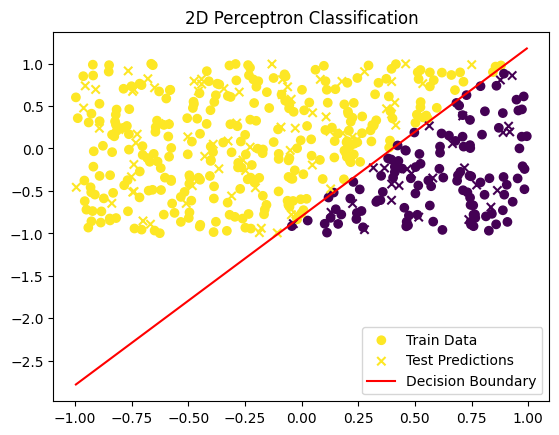

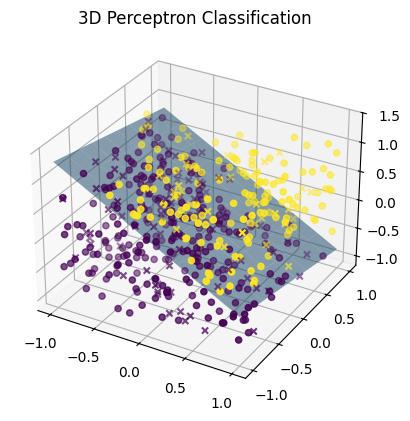

In [7]:
from sklearn.model_selection import train_test_split

data_2d = pd.read_csv('2D.csv', skiprows=1, delimiter=';', names=['X1', 'X2', 'L'], decimal=',')
data_3d = pd.read_csv('3D.csv', skiprows=1, delimiter=';', names=['X1', 'X2',  'X3', 'L'], decimal=',')

X_2d = np.array(data_2d.iloc[:, :-1])
y_2d = data_2d['L'].values

X_3d = np.array(data_3d.iloc[:, :-1])
y_3d = data_3d['L'].values

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_3d, y_3d, test_size=0.2, random_state=42)

perceptron_2d = Perceptron(n=X_train_2d.shape[1])
perceptron_3d = Perceptron(n=X_train_3d.shape[1])

perceptron_2d.train(X_train_2d, y_train_2d, eta=0.1, tol=0)
perceptron_3d.train(X_train_3d, y_train_3d, eta=0.1, tol=0)

errors_2d, predictions_2d = perceptron_2d.evaluate_test(X_test_2d, y_test_2d)
errors_3d, predictions_3d = perceptron_3d.evaluate_test(X_test_3d, y_test_3d)

print(f"Test error for 2D data: {errors_2d}")
print(f"Test error for 3D data: {errors_3d}")

def plot_2d(X_train, y_train, X_test, y_test, predictions):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train Data', marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, label='Test Predictions', marker='x')
    x_values = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
    y_values = -(perceptron_2d.w[0] * x_values + perceptron_2d.b) / perceptron_2d.w[1]
    plt.plot(x_values, y_values, label='Decision Boundary', color='red')
    plt.legend()
    plt.title('2D Perceptron Classification')
    plt.show()

def plot_3d(X_train, y_train, X_test, y_test, predictions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, marker='o', label='Train Data')
    ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=predictions, marker='x', label='Test Predictions')
    x = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 10)
    y = np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 10)
    x, y = np.meshgrid(x, y)
    z = -(perceptron_3d.w[0] * x + perceptron_3d.w[1] * y + perceptron_3d.b) / perceptron_3d.w[2]
    ax.plot_surface(x, y, z, alpha=0.5)
    ax.set_title('3D Perceptron Classification')
    plt.show()

plot_2d(X_train_2d, y_train_2d, X_test_2d, y_test_2d, predictions_2d)
plot_3d(X_train_3d, y_train_3d, X_test_3d, y_test_3d, predictions_3d)